**Bushra Hoteit**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


**1. Data Preparation and Exploration**

***Load and preprocess the MNIST dataset, normalizing the images and flattening them into vectors suitable for analysis. Use the Scikit-learn library to load the MNIST dataset instead of downloading it from an external website.***

In [7]:
# Loading the data

mnist = fetch_openml('mnist_784', version=1)

X= mnist.data/255.0    # Normalizing the images
y= mnist.target


# Data already falttened
print("Data shape:", X.shape)
print("Labels shape:", y.shape)

# Each image is 28 x 28 = 784 pixels v --> vector length 784

Data shape: (70000, 784)
Labels shape: (70000,)


***Perform exploratory data analysis to understand the distribution and characteristics of the data.***

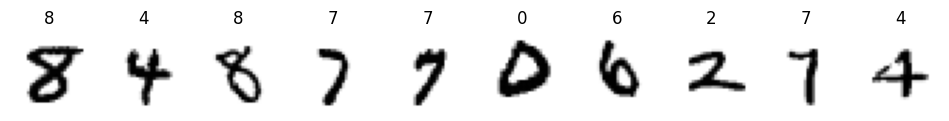

In [15]:
# Sample of data for quicker execution

np.random.seed(42)
rnd_sample = np.random.choice(np.arange(len(X)), 10000, replace = False)
X_sample = X.iloc[rnd_sample]
y_sample = y.iloc[rnd_sample]

# Displaying the sampled images

fig, axes = plt.subplots(1, 10, figsize=(12,3))
for i, ax in enumerate(axes):
    ax.imshow(X_sample.iloc[i].values.reshape(28,28), cmap='gray_r')
    ax.axis('off')
    ax.set_title(y_sample.values[i])

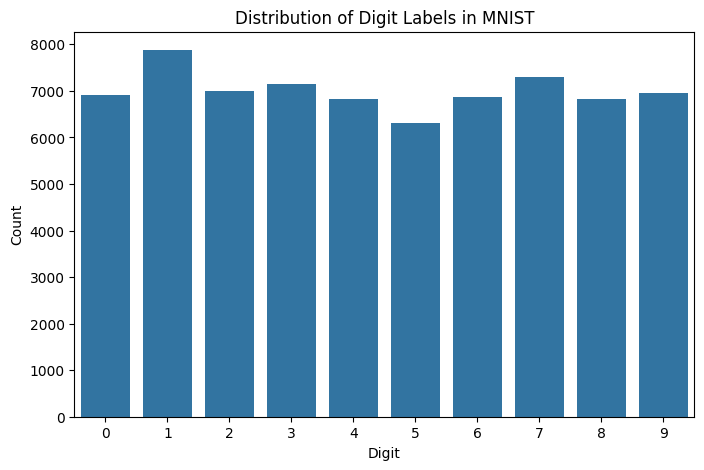

In [16]:
# Label distribution for all the dataset

plt.figure(figsize=(8,5))
sns.countplot(x=y)
plt.title("Distribution of Digit Labels in MNIST")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

# Count of each digit is somewhat on the same levels, we dont see a big difference between the counts.
# Highest count was for digid '1' at around 7800 counts.

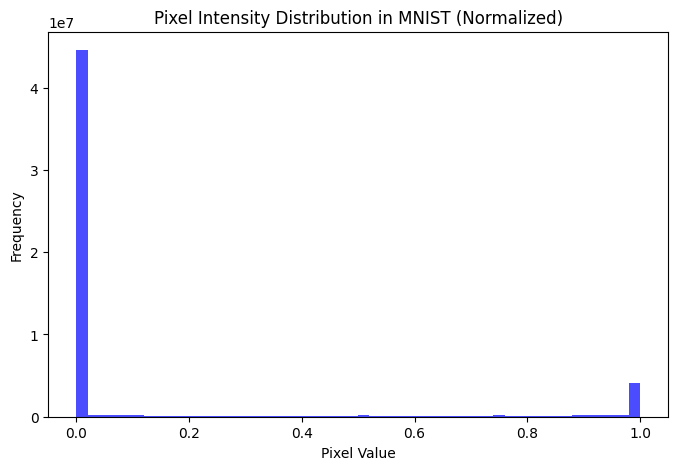

Min pixel value: 0.0
Max pixel value: 1.0
Mean pixel value: 0.1309
Std pixel value: 0.3084


In [17]:
# Flatten pixel values into a single array for histogram
pixels = X.values.flatten() if isinstance(X, pd.DataFrame) else X.flatten()

# Pixel distribution for all the dataset
plt.figure(figsize=(8, 5))
plt.hist(pixels, bins=50, color='blue', alpha=0.7)
plt.title("Pixel Intensity Distribution in MNIST (Normalized)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

print(f"Min pixel value: {pixels.min()}")
print(f"Max pixel value: {pixels.max()}")
print(f"Mean pixel value: {pixels.mean():.4f}")
print(f"Std pixel value: {pixels.std():.4f}")

# The average pixel intensity is around 0.13 (low) on a 0–1 scale.
# Most pixels are closer to black.

**2. Clustering**

***Apply the K-Means clustering algorithm to identify groups within the dataset.***

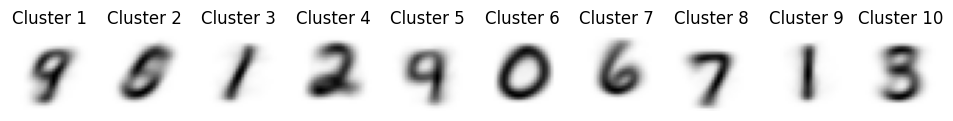

In [26]:
from sklearn.cluster import KMeans

# K means to identify the 10 clusters in the dataset
kmeans = KMeans(n_clusters=10, random_state=42)
X_clustered = kmeans.fit_predict(X_sample)

# Visualizing each cluster’s centroid, which shows the “average digit” shape for that cluster
fig, axes = plt.subplots(1, 10, figsize=(12,3))
for i, ax in enumerate(axes):
    ax.imshow(kmeans.cluster_centers_[i].reshape(28,28), cmap='gray_r')
    ax.axis('off')
    ax.set_title(f'Cluster {i+1}')

# Each image is assigned to a cluster label (1-10)

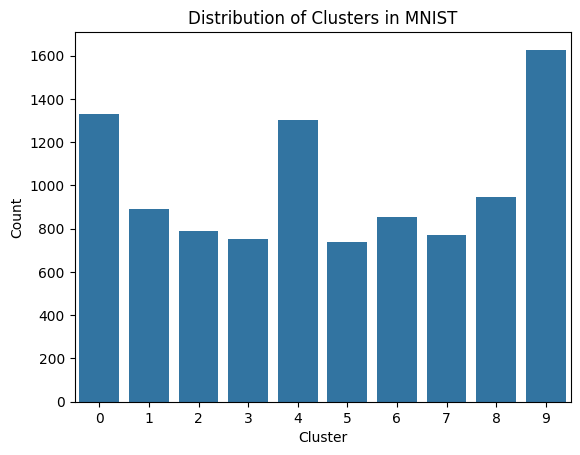

In [19]:
# Distribtuion of the clusters

sns.countplot(x=X_clustered)
plt.title("Distribution of Clusters in MNIST")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.show()

***Determine the optimal number of clusters using techniques like the elbow method.***

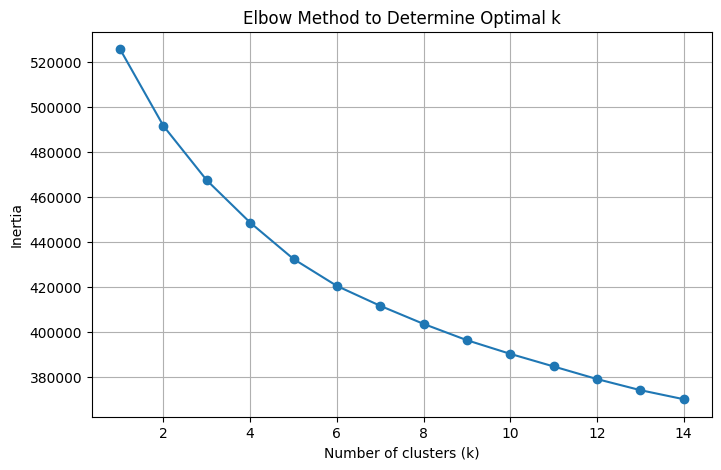

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(1, 15)  # test k from 1 to 15

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_sample)
    inertia.append(kmeans.inertia_)

# Plotting the elbow plot
plt.figure(figsize=(8,5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()


# Assuming the optimal k is 10 since edge is not showing

***Analyze cluster centroids to interpret the characteristics of each group.***

Cluster labels assigned: [ 1  2  3  4  5  6  7  8  9 10]


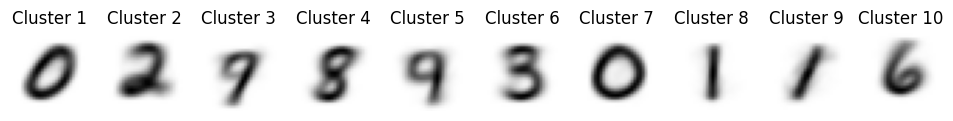

In [52]:
# Apply K-Means with Optimal k

optimal_k = 10
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_sample)

print("Cluster labels assigned:", np.unique(clusters+1))

# Visualizing each cluster’s centroid, which shows the “average digit” shape for that cluster

fig, axes = plt.subplots(1, 10, figsize=(12,3))
for i, ax in enumerate(axes):
    ax.imshow(kmeans.cluster_centers_[i].reshape(28,28), cmap='gray_r')
    ax.axis('off')
    ax.set_title(f'Cluster {i+1}')

# Each centroid resembles a digit, representing the average of images in that cluster.
# This helps us understand what each cluster represents visually after training
# Clusters are blurry bcuz they have multiple digits
# For example, cluster 1 potentially has 0 digits

**3. Model Evaluation and Prediction**

***Demonstrate how to use the trained K-Means model to assign cluster labels to new image data instances.***

In [39]:
# New cluster prediction
# Check how the new images are clustered

# Sample of 50 new images from the dataset
new_X = X.sample(10, random_state=42)

# Using the trained K-Means model to predict their cluster assignments
new_clusters = kmeans.predict(new_X)

print("New instances of cluster assignments:", new_clusters+1)


New instances of cluster assignments: [ 4  3  6  3  3  1 10  5  8  5]


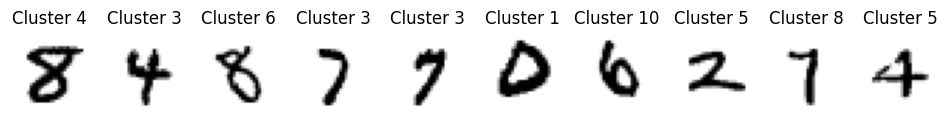

In [40]:
# Visualizing the predictions

fig, ax = plt.subplots(1, 10, figsize=(12,3))
for i, idx in enumerate(new_X.index):
    ax[i].imshow(X.loc[idx].values.reshape(28,28), cmap='gray_r')
    ax[i].axis('off')
    ax[i].set_title(f'Cluster {new_clusters[i]+1}')

# This shows us actual images with their predicted cluster after training the model

***Validate the model by predicting cluster assignments for a separate set of images and analyzing their fit with existing clusters.***

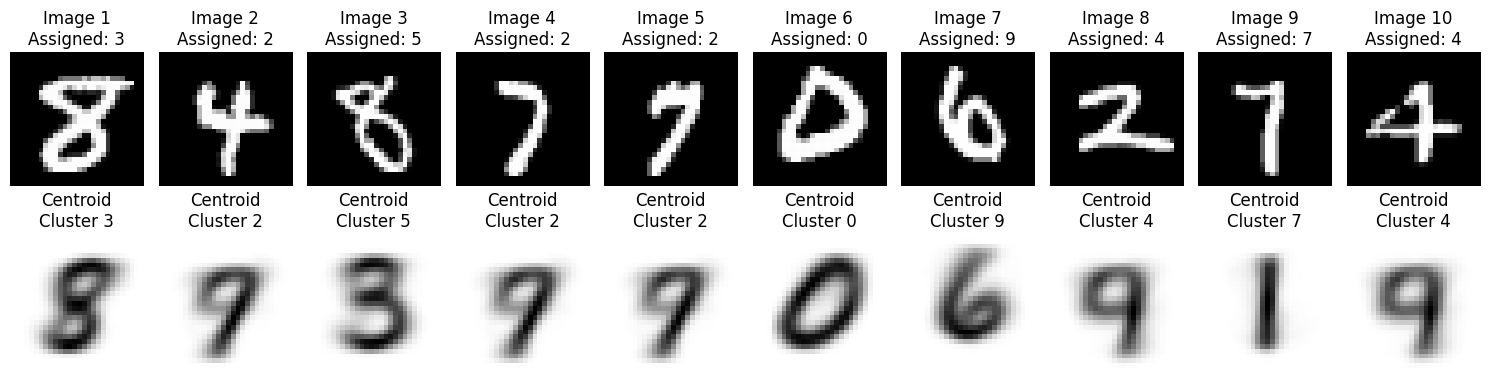

In [47]:
# Visual side by side comparison

fig, axes = plt.subplots(2, 10, figsize=(15, 4))

for i, idx in enumerate(new_X.index):
    # Top row: the new image
    axes[0, i].imshow(X.loc[idx].values.reshape(28,28), cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Image {i+1}\nAssigned: {new_clusters[i]}')

    # Bottom row: the centroid of the assigned cluster
    axes[1, i].imshow(kmeans.cluster_centers_[new_clusters[i]].reshape(28,28), cmap='gray_r')
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Centroid\nCluster {new_clusters[i]}')

plt.tight_layout()
plt.show()

# We compared 10 new unseen MNIST images with the cluster centroids obtained from K-Means clustering.
# Visual inspection shows that the images mostly resemble their assigned cluster centroids, confirming alignment.
# For example, number 8 in image 1 was assigned to cluster 3 which is the same as the centroid number under cluster 3


In [51]:
# Validating quantitatively by calculating the distance to centroid

# Distribution of distances across all training samples

distances_all = kmeans.transform(X_sample)
min_distances = np.min(distances_all, axis=1)

print(f"Min distance: {min_distances.min():.4f}")
print(f"Max distance: {min_distances.max():.4f}")
print(f"Mean distance: {min_distances.mean():.4f}")
print(f"Median distance: {np.median(min_distances):.4f}")


Min distance: 2.7182
Max distance: 11.0806
Mean distance: 6.1423
Median distance: 6.2001


In [48]:
# Euclidean distance between the image and its assigned centroid

from numpy.linalg import norm

distances = []
for i in range(len(new_X)):
    image_vector = new_X.iloc[i].values
    centroid_vector = kmeans.cluster_centers_[new_clusters[i]]
    distance = norm(image_vector - centroid_vector)
    distances.append(distance)

for i, dist in enumerate(distances):
    print(f"Image {i+1} assigned to Cluster {new_clusters[i]} with distance {dist:.4f}")

# The lower the distance the better the fit
# So the sample images with distance less than the mean of 6.14 are better fit to the cluster & vice versa
# For example, sample Image 4 had the lowest distance (4.7) from the centroid of that cluster which is very good.

Image 1 assigned to Cluster 3 with distance 7.8125
Image 2 assigned to Cluster 2 with distance 6.4304
Image 3 assigned to Cluster 5 with distance 7.2654
Image 4 assigned to Cluster 2 with distance 5.3119
Image 5 assigned to Cluster 2 with distance 4.7845
Image 6 assigned to Cluster 0 with distance 7.2409
Image 7 assigned to Cluster 9 with distance 7.3232
Image 8 assigned to Cluster 4 with distance 7.6429
Image 9 assigned to Cluster 7 with distance 5.2995
Image 10 assigned to Cluster 4 with distance 6.1624


**4. Dimensionality Reduction and Visualization**

***Use PCA and t-SNE to reduce the dimensionality of the dataset for visualization purposes.***

***Visualize the clusters in two-dimensional space to assess the effectiveness of the clustering process and explore the relationships between different clusters.***

Explained variance by 2 components: 0.1694


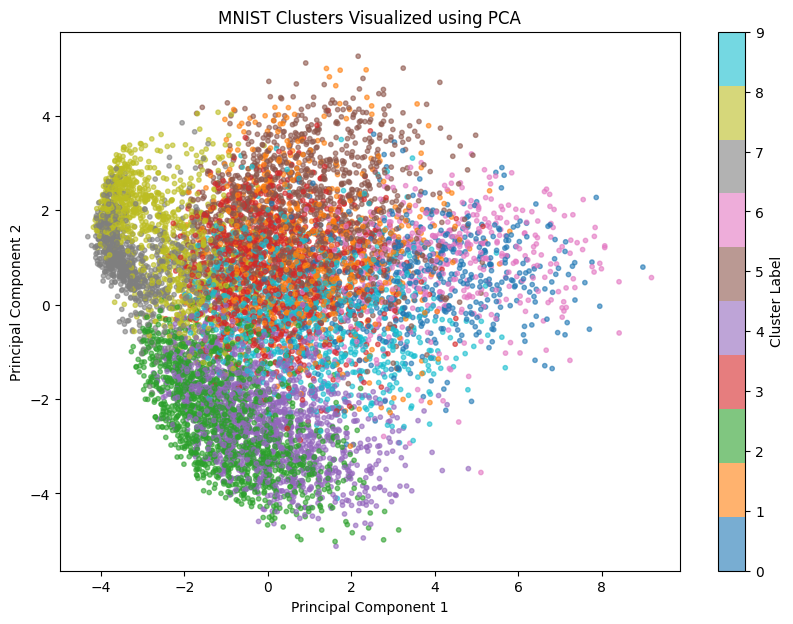

In [54]:
from sklearn.decomposition import PCA

# Reduce to 2D for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_sample)

print(f"Explained variance by 2 components: {pca.explained_variance_ratio_.sum():.4f}")

# Visualize clusters in 2D PCA space
plt.figure(figsize=(10,7))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='tab10', alpha=0.6, s=10)
plt.title("MNIST Clusters Visualized using PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Cluster Label')
plt.show()

# Visualizes how well-separated the clusters are after K-Means.
# However using PCA the clusters are mostly overlapping each other.

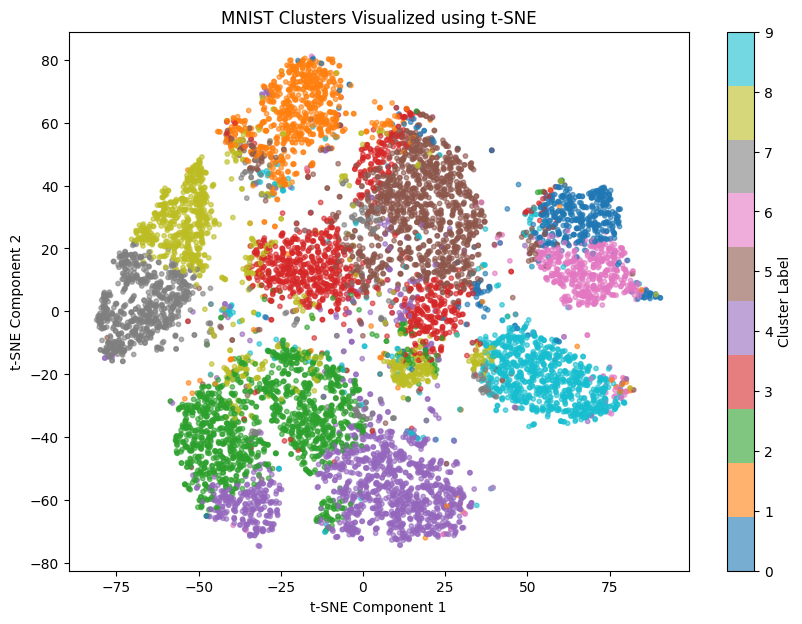

In [56]:
from sklearn.manifold import TSNE

# Using a smaller subset to avoid memory issues
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_sample)

# Visualizing clusters in 2D t-SNE space
plt.figure(figsize=(10,7))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=clusters, cmap='tab10', alpha=0.6, s=10)
plt.title("MNIST Clusters Visualized using t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.colorbar(scatter, label='Cluster Label')
plt.show()

# Reduces dimensionality.
# t-SNE shows better separated groups compared to PCA.
# t-SNE focuses on preserving local structures, which shows the true shape of clusters, often separating them better visually than PCA.
# However, we still have some overlapping clusters. Probably because some numbers share similar features.